In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import scipy.stats as stat
import sys
from sklearn.metrics import accuracy_score

In [2]:
#data generation

def ygeneration(X):
  fx = (X['X1']*np.sqrt(np.abs(X['X4'])+1)+ np.sin(X['X3'])
   - np.abs(X['X2'])/(np.sqrt(np.abs(X['X5'])+1)) +1.5*np.abs(X['X6']) +X['X7'])
  p = 1/ (1+np.exp(-fx))
  y=[]
  for i in range(len(p)):
    y.append(np.random.binomial(n=1, p=p[i], size=1 ))
  return np.ravel(y)

Xtrain = {}
for i in range(7):
  if i <=2:
    Xtrain[f'X{i+1}'] = np.random.uniform(-10,10,1000)
  else:
    Xtrain[f'X{i+1}'] = np.random.normal(loc=0, scale = np.sqrt(10),size = 1000)
Xtrain = pd.DataFrame(Xtrain)


Xtest = {}
for i in range(7):
  if i <=2:
    Xtest[f'X{i+1}'] = np.random.uniform(-10,10,1000)
  else:
    Xtest[f'X{i+1}'] = np.random.normal(loc=0, scale = np.sqrt(10),size = 1000)
Xtest = pd.DataFrame(Xtest)

ytrain = ygeneration(Xtrain)
ytest = ygeneration(Xtest)

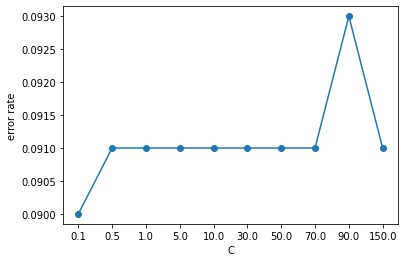

the best C : 0.1


In [3]:
#1. fitting using linear SVM
C = np.array([ 0.1, 0.5, 1, 5, 10, 30, 50, 70, 90, 150])

linearclf = {}
errorrate = []
for i in range(len(C)):
  linearclf[f'SVC{i}'] = SVC(kernel='linear', random_state=0, C=C[i])
  linearclf[f'SVC{i}'].fit(Xtrain, ytrain)
  errorrate.append(1-accuracy_score(ytest, linearclf[f'SVC{i}'].predict(Xtest)))

#2. drawing graphs
plt.plot(errorrate ,marker="o")
plt.xticks(range(len(C)), C)
plt.xlabel('C')
plt.ylabel('error rate')
plt.show()

#3. the lowest error rate one
linearC = C[np.argmin(errorrate)]
print('the best C :', linearC)

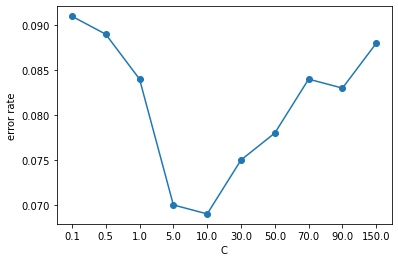

the best C : 10.0


In [4]:
#4. fitting using non-linear SVM
C = np.array([ 0.1, 0.5, 1, 5, 10, 30, 50, 70, 90, 150])

rbfclf = {}
errorrate = []
for i in range(len(C)):
  rbfclf[f'SVC{i}'] = SVC(kernel='rbf', random_state=0, C=C[i])
  rbfclf[f'SVC{i}'].fit(Xtrain, ytrain)
  errorrate.append(1-accuracy_score(ytest, rbfclf[f'SVC{i}'].predict(Xtest)))

#5. drawing graphs
plt.plot(errorrate, marker = 'o')
plt.xticks(range(len(C)), C)
plt.xlabel('C')
plt.ylabel('error rate')
plt.show()

#6. the lowest error rate one
rbfC = C[np.argmin(errorrate)]
print('the best C :', rbfC)


In [5]:
#7 result
sys.stdout = open('result.txt','w')

print('    ')
print('Linear Kernel SVM(C=',linearC ,')')
print( 'Confusion Matrix( SVM-linear)')
print('----------------------------------------------------')
confusion_tst = confusion_matrix(ytest, 
                                 linearclf[f'SVC{np.where(C==linearC)[0][0]}'].predict(Xtest))

accu_tst = 0
for i in range(len(np.unique(ytest))):
  accu_tst = accu_tst + confusion_tst[i][i]
accuracy_tst = accu_tst / len(ytest)

print('           predicted class \n Actual 1 ' ,confusion_tst[0], 
      '\n class  2 ', confusion_tst[1])
for i in range(2, len(np.unique(ytest))) :
  print(f'        {i+1} ', confusion_tst[i])
print('model summary')
print('----------------------------------')
print('Overall accuracy = ' ,accuracy_tst)

print('    ')
print('RBF Kernel SVM(C=',rbfC ,')')
print( 'Confusion Matrix( SVM-rbf)')
print('----------------------------------------------------')
confusion_tst = confusion_matrix(ytest, 
                                 rbfclf[f'SVC{np.where(C==rbfC)[0][0]}'].predict(Xtest))

accu_tst = 0
for i in range(len(np.unique(ytest))):
  accu_tst = accu_tst + confusion_tst[i][i]
accuracy_tst = accu_tst / len(ytest)

print('           predicted class \n Actual 1 ' ,confusion_tst[0], 
      '\n class  2 ', confusion_tst[1])
for i in range(2, len(np.unique(ytest))) :
  print(f'        {i+1} ', confusion_tst[i])
print('model summary')
print('----------------------------------')
print('Overall accuracy = ' ,accuracy_tst)